In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
bias0 = [0]*15
bias1 = [0]*10
re_bias0 = [0]*15
re_bias1 = [0]*10
weight0 = [[0 for i in range(784)]for i in range(15)]
weight1 = [[0 for i in range(15)]for i in range(10)]
re_weight0 = [[0 for i in range(784)]for i in range(15)]
re_weight1 = [[0 for i in range(15)]for i in range(10)]

Input0 = [0]*15
Input1 = [0]*10
Output0 = [0]*15
Output1 = [0]*10

Input0_test = [0]*15
Input1_test = [0]*10
Output0_test = [0]*15
Output1_test = [0]*10

for i in range(15):
    bias0[i] = np.random.rand()*0.1
for i in range(10):
    bias1[i] = np.random.rand()*0.1
for i in range(15):
    for j in range(784):
        weight0[i][j] = np.random.randn()*0.1
for i in range(10):
    for j in range(15):
        weight1[i][j] = np.random.randn()*0.1

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def diff(x):
    return  (1-sigmoid(x))*sigmoid(x)    

def softmax(x_array):
    a = np.max(x_array)
    exp_x = np.exp(x_array-a)
    sum_exp_x = np.sum(exp_x)
    y_array = exp_x/sum_exp_x
    return y_array

def delta(num,t_n,Op1,Ip1,we1):
    sum_1 = 0
    for i in range(10):
        sum_1 += (Op1[i]-t_n[i])*we1[i][num]*diff(Ip1[i])
    return sum_1

def back_propagation(Out0,Out1,In0,In1,t_num,x_t,l_rate):
    
    global weight0
    global weight1
    global bias0
    global bias1
    
    for i in range(10):
        x = (Out1[i]-t_num[i])*diff(In1[i])
        for j in range(15):
            re_weight1[i][j] = x
            weight1[i][j] -= l_rate*re_weight1[i][j]*Out0[j]
    
    for i in range(15):
        x = delta(i,t_num,Out1,In1,weight1)*diff(In0[i])
        for j in range(784):
            re_weight0[i][j] = x
            weight0[i][j] -= l_rate*re_weight0[i][j]*x_t[j]
    
    for i in range(10):
        re_bias1[i] = (Out1[i]-t_num[i])*diff(In1[i])
        bias1[i] -= l_rate*re_bias1[i]
        
    for i in range(15):
        re_bias0[i] = delta(i,t_num,Out1,In1,weight1)*diff(In0[i])
        bias0[i] -= l_rate*re_bias0[i]
        
def accuracy(y_list,t_list,switch):
    max_y = np.argmax(y_list,axis=1)
    max_t = np.argmax(t_list,axis=1)
    if switch == "train":
        return np.sum(max_y == max_t)/100
    elif switch == "test":
        return np.sum(max_y == max_t) / 10000

def sum_of_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)
        
def make_round_num(n):
    rounds = [0] * n
    for i in range(n):
        rounds[i] = i
    return rounds

def plot_figure(acc, loss, num):
    x = make_round_num(num)
    y = acc
    z = loss
    plt.plot(x, y, label = "accuracy")
    plt.plot(x, z, label = "loss")
    plt.legend(loc = "lower right")
    plt.savefig("./train_acc_loss.jpg")

In [32]:
learning_rate = 0.05
epochs = 7
input_words = 1    # max =<600
train_loss_acc_figure_save_path = "./mnist_no_keras_tensorflow_train.jpg"

0 epochs
During 0 round
train_accuracy = 0.99
train_loss     = 0.05580859126355271
1 epochs
During 1 round
train_accuracy = 0.99
train_loss     = 0.046086697768335454
2 epochs
During 2 round
train_accuracy = 0.99
train_loss     = 0.04069079609142702
3 epochs
During 3 round
train_accuracy = 0.99
train_loss     = 0.037245429059176875
4 epochs
During 4 round
train_accuracy = 0.99
train_loss     = 0.034799048380800335
5 epochs
During 5 round
train_accuracy = 0.99
train_loss     = 0.03291460247715247
6 epochs
During 6 round
train_accuracy = 1.0
train_loss     = 0.03137145554775448


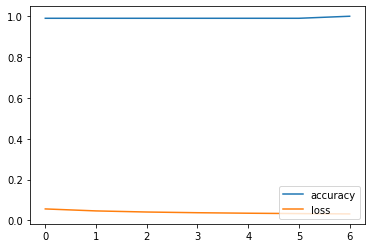

In [33]:
all_train_accuracy = []
all_train_loss = []

for l in range(epochs):
    print(str(l)+" epochs")
    for k in range(input_words):
        train_prediction = []
        train_answer = []
        print("During "+str(l*input_words+k)+" round")
        for j in range(100):  
            for i in range(15):
                Input0[i]  = np.dot(x_train[k*100+j],weight0[i])+bias0[i]
                Output0[i] = sigmoid(Input0[i])
            for i in range(10):
                Input1[i] = np.dot(Output0,weight1[i])+bias1[i]
            
            Output1 = softmax(Input1)        
            train_num = [0]*10
            train_num[y_train[k*100+j]] = train_num[y_train[k*100+j]]+1
        
            train_prediction.append(Output1)
            train_answer.append(train_num)

            back_propagation(Output0,Output1,Input0,Input1,train_num,x_train[k*100+j],learning_rate)
            
        train_acc = accuracy(train_prediction,train_answer,"train")
        train_loss = sum_of_squares_error(Output1,train_num)
            
        print("train_accuracy = "+str(train_acc))
        print("train_loss     = "+str(train_loss))
            
        all_train_accuracy.append(train_acc)
        all_train_loss.append(train_loss)
    
    
        
number = epochs*input_words          
plot_figure(all_train_accuracy, all_train_loss,number)

In [34]:
test_prediction = []
test_answer = []

for j in range(10000):
    for i in range(15):
        Input0_test[i] = np.dot(x_test[j],weight0[i])+bias0[i]
        Output0_test[i] = sigmoid(Input0_test[i])
    for i in range(10):
        Input1_test[i] = np.dot(Output0_test,weight1[i])+bias1[i]
    Output1_test = softmax(Input1_test)
    test_num = [0]*10
    test_num[y_test[j]] = test_num[y_test[j]]+1
        
    test_prediction.append(Output1_test)
    test_answer.append(test_num)
    
test_acc = accuracy(test_prediction,test_answer,"test")
test_loss = sum_of_squares_error(Output1_test,test_num)
    
print("test_accuracy = "+str(test_acc))
print("test_loss     = "+str(test_loss))

test_accuracy = 0.7357
test_loss     = 0.06866682840257236
